# Intro to Data Science - Project Phase 1

Explain why you selected this dataset, what is the target variable you
want to predict (is it regression or classification based problem)
+ The dataset contains several traits describing the drivers, environmental conditions, as well as the type of coupon, and whether the driver in each instance had accepted a coupon (variable "Y"). We will wrangle and clean this data and observe how the conditions influence the driver to make their decision "Y", which will be our target variable, using a binary classification model.

Clean the data using preprocessing techniques, perform EDA and share your insights.


In [1]:
#installing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

#importing the dataset
from google.colab import files
uploaded = files.upload()
#importing the dataset
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
#Here Y is the Target variable
#We display the data below to get a better look at each variable and what we will have to do to clean the data
df

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation.csv


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [2]:
df.info() #This provides the data types of each feature we may have to adjust

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
df.describe() # Gives us general metrics describing each column of numeric features

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


From the correlation matrix, we see that feature 'direction_same' and 'direction_opp' perfectly correlated with each other since they contain same correlation value with the target feature, so we can remove one of the features.

Additionally, 'toCoupon_GEQ5min' feature does not correlate with the target variable since it contains value '1' for all data points, which means all the food venues are at least more than 5 minutes away. We decided to also drop direction_same as majority of the data points for the feature was 0.

Overall, we decided to remove 'direction_same' 'direction_opp' and 'toCoupon_GEQ5min' feature since they will not be useful in this analysis.

In [6]:
df = df.drop(['toCoupon_GEQ5min','direction_same','direction_opp'], axis = 1)

In [7]:
#Finding missing values - add a percentage
missing_values = df.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
Y                           0
dtype: int64


The information provided above shows the sum of missing values in each feature, in this case: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50. Since these are all categorical features, we can use mode imputation to substitute the missing values in each with the most occuring instance per feature.

In [8]:
#First we define the categorical columns we want to impute
categorical_columns = df[['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].columns

#Next we impute the missing values in categorical columns with the mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

#Checking if there are any more missing values in the mode imputed df
df_imputed = df[categorical_columns].isnull().sum()
print(df_imputed)

car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64


In [9]:
df.head()
print(df.isnull().sum())
print(df_imputed.info())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
Y                       0
dtype: int64
<class 'pandas.core.series.Series'>
Index: 6 entries, car to Restaurant20To50
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 96.0+ bytes
None


With mode imputation, we have gotten rid of all missing values in categorical columns.

Next we will encode the features described in numerical intervals as well as the categorical features so that they may be used in data exploratory analysis. Below, we print the data types of each category along with the count of how many unique values there are in each. This will allow us to assess what type of encoding we will apply.

In [10]:
df_types = df.dtypes

df_unique_count = df.nunique()

df_types_and_unique_count = pd.DataFrame({"Data Types": df_types, "Unique Value Counts": df_unique_count})

print(df_types_and_unique_count)

                     Data Types  Unique Value Counts
destination              object                    3
passanger                object                    4
weather                  object                    3
temperature               int64                    3
time                     object                    5
coupon                   object                    5
expiration               object                    2
gender                   object                    2
age                      object                    8
maritalStatus            object                    5
has_children              int64                    2
education                object                    6
occupation               object                   25
income                   object                    9
car                      object                    5
Bar                      object                    5
CoffeeHouse              object                    5
CarryAway                object               

To facilitate analyses, we will apply label encoding on features with more than 5 unique values. One hot encoding was applied on features with 3-5 unique values.

In [11]:
from sklearn.preprocessing import LabelEncoder

col= ["time", "coupon", "education", "occupation", "age", "income"]


label_encoders = {}
for column in col:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


#one hot encoding

data=pd.get_dummies(df, columns=["destination", "weather"])

In [12]:
des = df.describe()

We will now check for outliers in the columns by using the IQR method.
If the value is less than 1.5 times the IQR values or above 1.5 times the IQR value, we will consider it an outlier

In [13]:
#Check the shape before removal
print(f'Shape before removal: {df.shape}')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]

# Check the shape after removal
print(f'Shape after removal: {df.shape}')


Shape before removal: (12684, 23)
Shape after removal: (12684, 23)


<ipython-input-13-544418394b9f>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-13-544418394b9f>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-13-544418394b9f>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]


In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temperature,time,coupon,age,has_children,education,occupation,income,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
temperature,1.000000,-0.059041,0.128771,-0.027556,-0.019716,0.015460,0.006536,-0.025091,-0.155332,NaN,0.061240
time,-0.059041,1.000000,0.047612,-0.008030,-0.007256,-0.003009,0.012835,-0.006210,0.007218,NaN,-0.047377
coupon,0.128771,0.047612,1.000000,0.002314,-0.010422,-0.000724,-0.002216,0.000871,-0.131571,NaN,0.097019
age,-0.027556,-0.008030,0.002314,1.000000,0.306306,0.086833,-0.016434,0.048782,0.026571,NaN,-0.035241
has_children,-0.019716,-0.007256,-0.010422,0.306306,1.000000,-0.055373,-0.112461,-0.000569,0.078211,NaN,-0.045557
education,0.015460,-0.003009,-0.000724,0.086833,-0.055373,1.000000,0.131968,0.001157,-0.019017,NaN,0.043023
occupation,0.006536,0.012835,-0.002216,-0.016434,-0.112461,0.131968,1.000000,0.163509,-0.022569,NaN,0.007521
income,-0.025091,-0.006210,0.000871,0.048782,-0.000569,0.001157,0.163509,1.000000,0.006196,NaN,-0.023949
toCoupon_GEQ15min,-0.155332,0.007218,-0.131571,0.026571,0.078211,-0.019017,-0.022569,0.006196,1.000000,NaN,-0.081602
toCoupon_GEQ25min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can further clean the data by removing duplicate rows:

In [16]:
#Checking for duplicate rows
duplicate_rows = df.duplicated()
#Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
#Drop the duplicates
df = df.drop_duplicates()
#Checking the shape of the data after dropping duplicates
print("Shape of DataFrame After Removing Duplicates: ", df.shape)

Number of duplicate rows: 171
Shape of DataFrame After Removing Duplicates:  (12513, 23)


In [17]:
#Below we have our cleaned data
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,55,2,4,1d,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,0,0.0,1
1,No Urgent Place,Friend(s),Sunny,80,0,2,2h,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,0,0.0,0
2,No Urgent Place,Friend(s),Sunny,80,0,1,2h,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,1,0.0,1
3,No Urgent Place,Friend(s),Sunny,80,2,2,2h,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,1,0.0,0
4,No Urgent Place,Friend(s),Sunny,80,2,2,1d,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,1,0.0,0


In [18]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,55,2,4,1d,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,0,0.0,1
1,No Urgent Place,Friend(s),Sunny,80,0,2,2h,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,0,0.0,0
2,No Urgent Place,Friend(s),Sunny,80,0,1,2h,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,1,0.0,1
3,No Urgent Place,Friend(s),Sunny,80,2,2,2h,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,1,0.0,0
4,No Urgent Place,Friend(s),Sunny,80,2,2,1d,Female,0,Unmarried partner,...,3,Mazda5,never,never,1~3,4~8,1~3,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,3,1,1d,Male,1,Single,...,6,Mazda5,never,never,1~3,4~8,1~3,0,0.0,1
12680,Work,Alone,Rainy,55,4,1,1d,Male,1,Single,...,6,Mazda5,never,never,1~3,4~8,1~3,0,0.0,1
12681,Work,Alone,Snowy,30,4,2,1d,Male,1,Single,...,6,Mazda5,never,never,1~3,4~8,1~3,0,0.0,0
12682,Work,Alone,Snowy,30,4,0,1d,Male,1,Single,...,6,Mazda5,never,never,1~3,4~8,1~3,1,NaN,0


Now that our data is clean we may create some visuals using combinations of the different features provided to assess which appear to have correlations that may affect whether a driver will accept coupons.

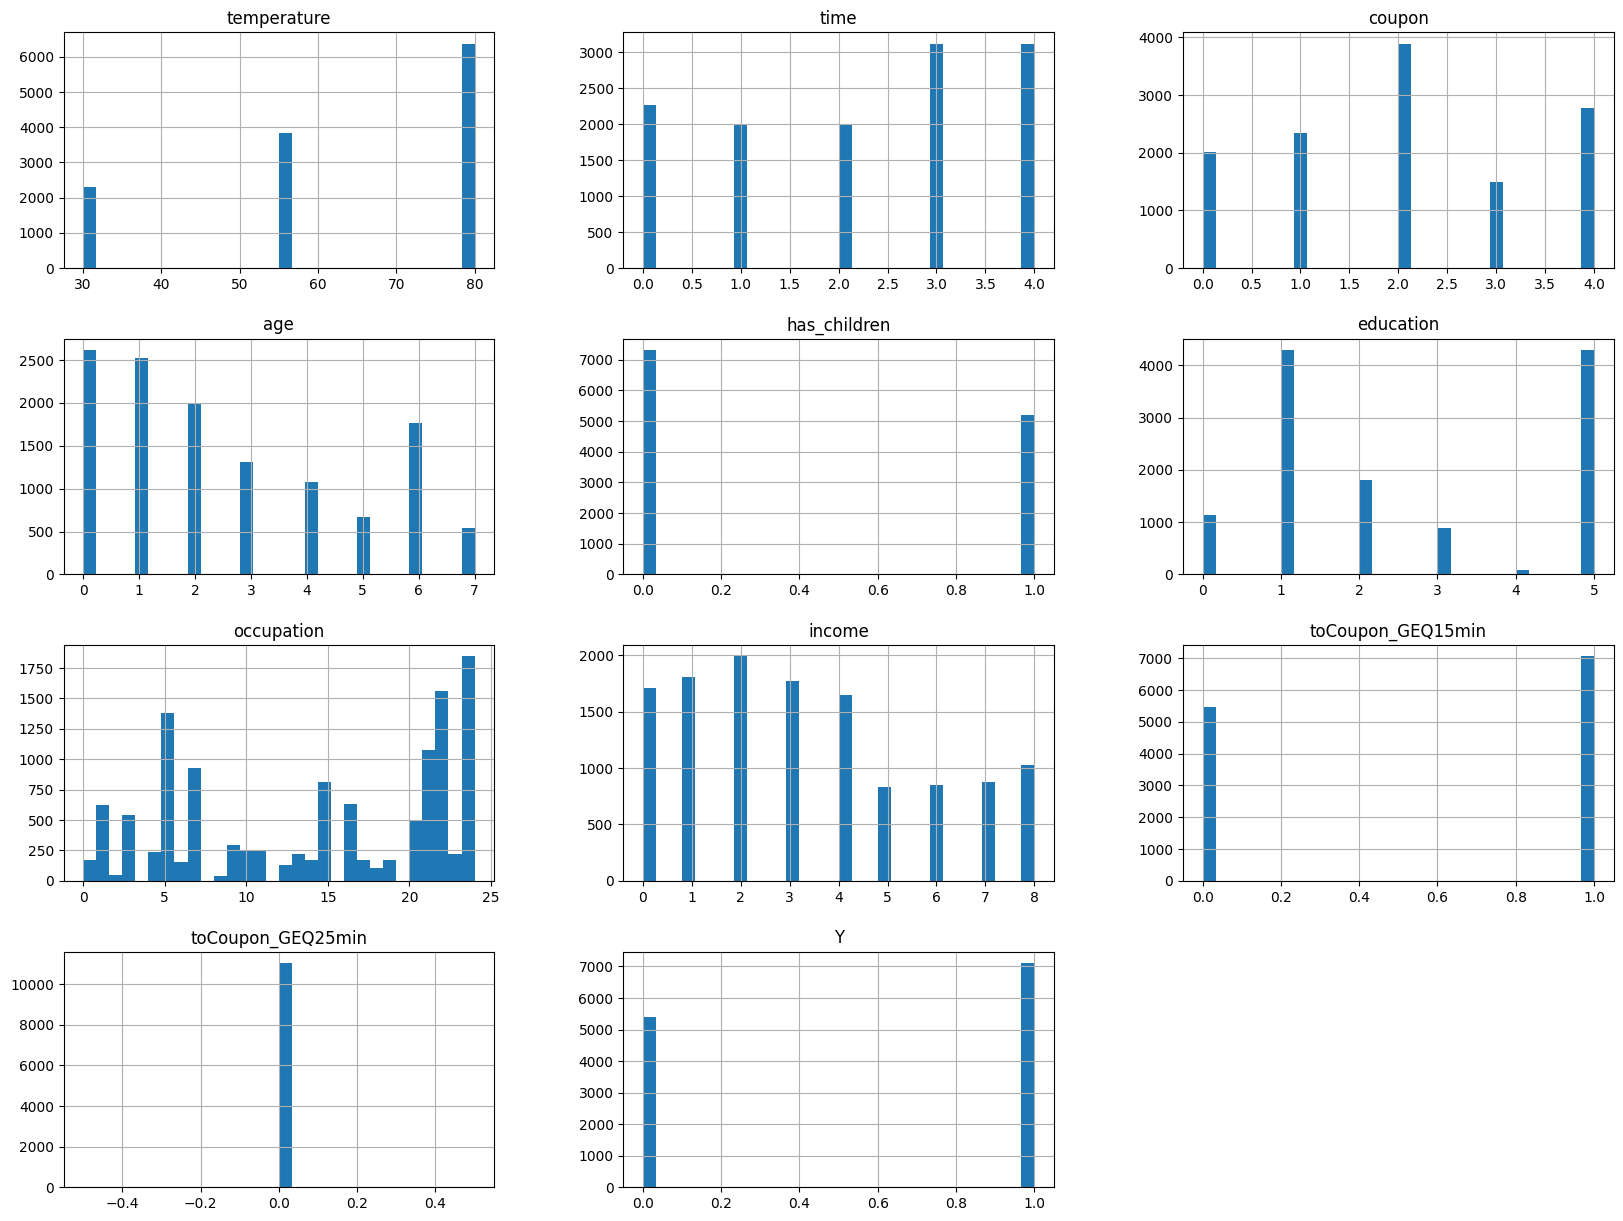

In [19]:
#Plotting a histograms for all numerical features
df.hist(bins = 30, figsize=(20,15))
plt.show()

The above briefly gives us a visual overview of each feature. We can utilize univariate analysis to get a better idea of how the income category may influence the drivers accepting the coupon.

Next we can logically determine that income is a significant feature to consider and thus can start by taking a closer look at how many drivers accepted a coupon based off that feature alone.

In [20]:
def univariate_analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name).Y.count())
    df_EDA['Accepted'] = list(data[data.Y==1].groupby(column_name).Y.count())
    df_EDA['Rejected'] = list(data[data.Y==0].groupby(column_name).Y.count())
    df_EDA['%Accepted'] = round(df_EDA['Accepted']/df_EDA['Total_Count']*100,3)
    df_EDA['%Rejected'] = round(df_EDA['Rejected']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(column_name+' coupons accepted')
    plt.show()

    return df_EDA

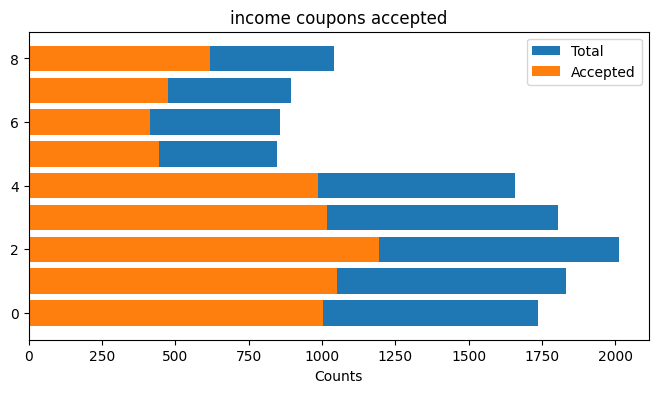

,income,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,2,2013,1194,819,59.314,40.686
1,1,1831,1052,779,57.455,42.545
3,3,1805,1018,787,56.399,43.601
0,0,1736,1004,732,57.834,42.166
4,4,1659,988,671,59.554,40.446
8,8,1042,618,424,59.309,40.691
7,7,895,476,419,53.184,46.816
6,6,857,414,443,48.308,51.692
5,5,846,446,400,52.719,47.281


In [21]:
univariate_analysis('income')

From the above, we can observe that:

+ Generally, people of all income ranges tend to accept coupons approximately half the time
+ The drivers who make average income have the highest ratio of accepting the coupons
+ The drivers who make the second highest annually have the hightest ratio of declining the coupons

Next we can do the same and make some generalizations for age:


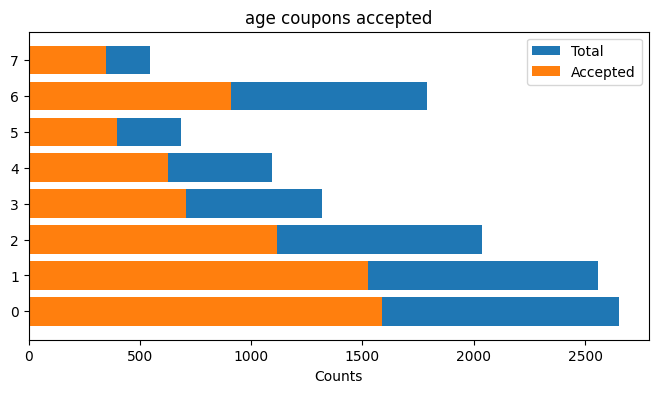

,age,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,0,2653,1587,1066,59.819,40.181
1,1,2559,1525,1034,59.594,40.406
2,2,2039,1114,925,54.635,45.365
6,6,1788,910,878,50.895,49.105
3,3,1319,706,613,53.525,46.475
4,4,1093,626,467,57.274,42.726
5,5,686,395,291,57.580,42.420
7,7,547,347,200,63.437,36.563


In [22]:
univariate_analysis('age')

We can observe that:

+ In general, the youngest and oldest people have a higher ratio of accepting the coupon
+ People in mid age range tend to accept the coupon less often

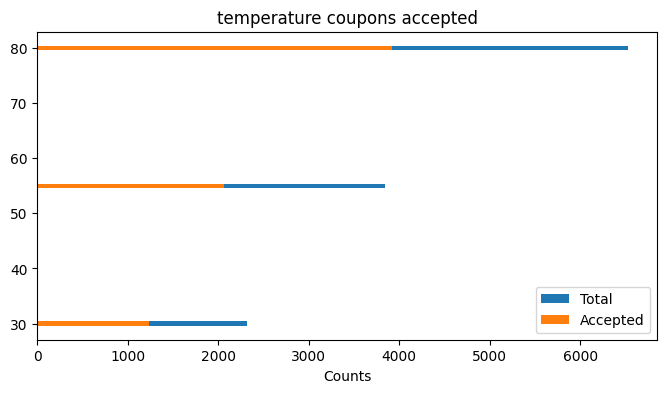

,temperature,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,80,6528,3919,2609,60.034,39.966
1,55,3840,2061,1779,53.672,46.328
0,30,2316,1230,1086,53.109,46.891


In [23]:
univariate_analysis('temperature')

From the above, we can observe that:

+ More people accepted the coupons when the temperature outside was higher (around 80 degrees) than in cooler days
+ People accepted coupons at the lowest rate in colder weather
+ Weather has an affect on the number of people who are more willing to accept a coupon when outside

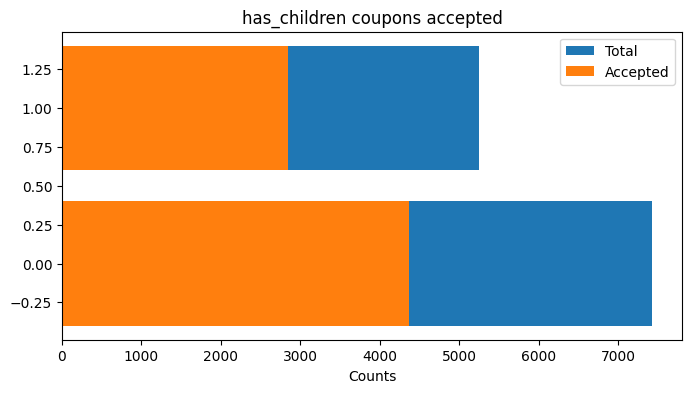

,has_children,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,0,7431,4365,3066,58.74,41.26
1,1,5253,2845,2408,54.16,45.84


In [24]:
univariate_analysis('has_children')

We can oberve that:

+ People with no children have a higher coupon acceptance ratio than those who do
+ There are more instances of people with no children in the dataset which may lead to bias


We may move forward, choosing two of the above variables to compare in a binary barplot with the coupon acceptance ratio:

<ipython-input-25-cbbae391ce45>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='Y', hue='coupon', ci=None, data=df, ax=axes[1])


Text(0.5, 1.0, 'Age vs Coupon (Acceptance Ratio)')

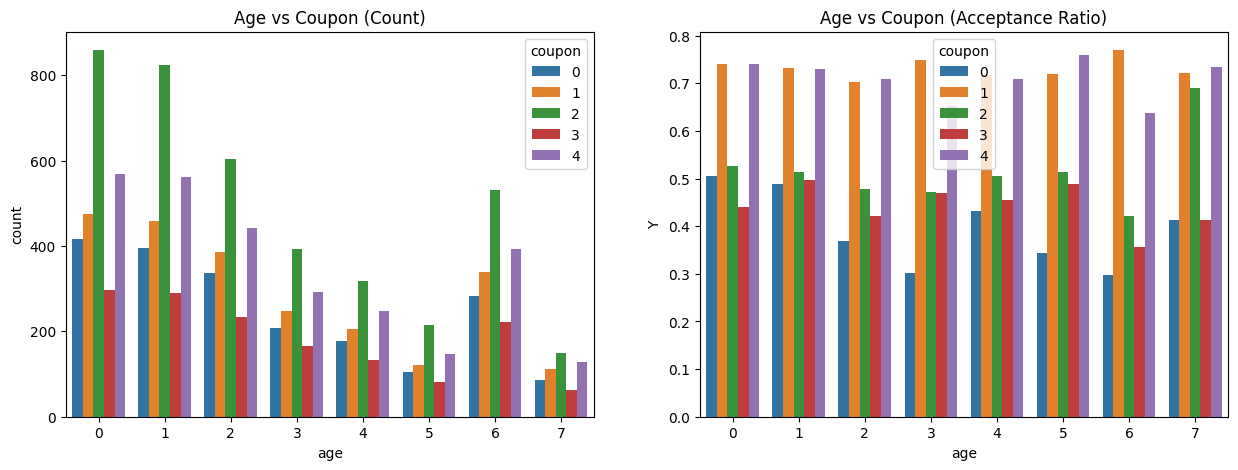

In [25]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='age', hue='coupon', data=df, ax=axes[0])
axes[0].set_title('Age vs Coupon (Count)')

sns.barplot(x='age', y='Y', hue='coupon', ci=None, data=df, ax=axes[1])
axes[1].set_title('Age vs Coupon (Acceptance Ratio)')


The above gives us a better overview of what the overall count of the type of coupons offered in the left visualization as well as how many of them were accepted per age group on the right.

<ipython-input-26-0e7f98e17014>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='Y', hue='coupon', ci=None, data=df, ax=axes[1])


Text(0.5, 1.0, 'Income vs Coupon (Acceptance Ratio)')

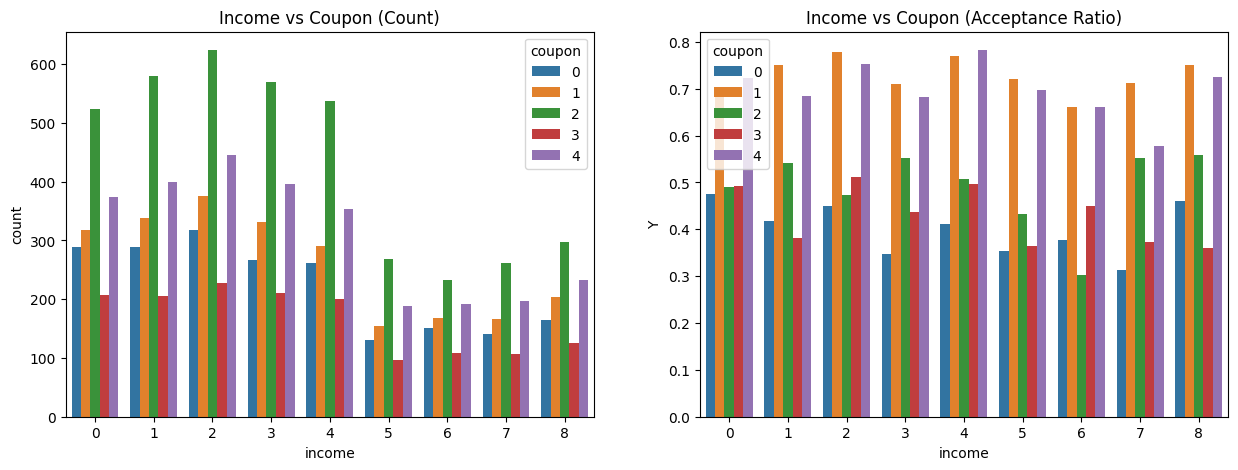

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='income', hue='coupon', data=df, ax=axes[0])
axes[0].set_title('Income vs Coupon (Count)')

sns.barplot(x='income', y='Y', hue='coupon', ci=None, data=df, ax=axes[1])
axes[1].set_title('Income vs Coupon (Acceptance Ratio)')


We use the same charts from the step before and replace the variable we are observing with the income. The same applies where we may observe the count of coupons of different types offered as well as how many were accepted, by groups of annual income.

To begin preparing for selecting which features we could use for our classification model, we may use a scatterplot to get an idea of the relationship between two variables we observed above with the target variable "Y".

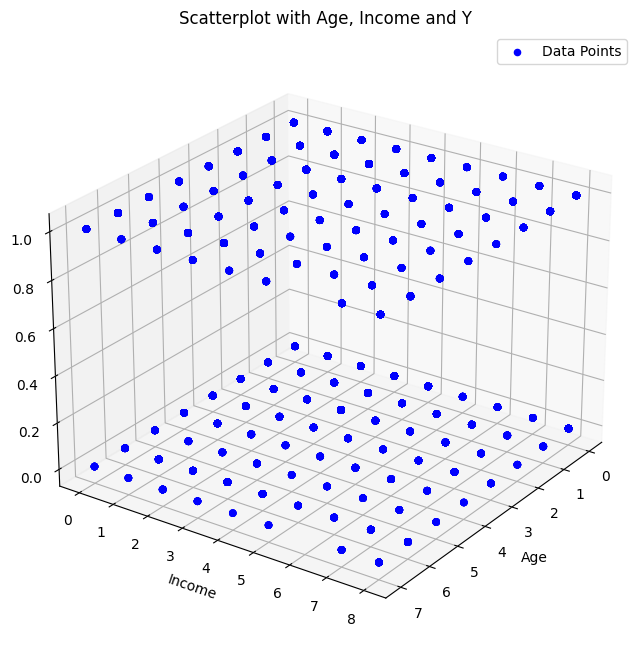

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['age']
y = df['income']
z = df['Y']

ax.scatter(x, y, z, c='b', marker='o', label='Data Points')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Y')

ax.set_title('Scatterplot with Age, Income and Y')
ax.view_init(azim=35, elev=25)
ax.legend()
plt.show()

Save the clean data set as npz file

In [39]:
nd_array = df.to_numpy()
nd_array

array([['No Urgent Place', 'Alone', 'Sunny', ..., 0, 0.0, 1],
       ['No Urgent Place', 'Friend(s)', 'Sunny', ..., 0, 0.0, 0],
       ['No Urgent Place', 'Friend(s)', 'Sunny', ..., 1, 0.0, 1],
       ...,
       ['Work', 'Alone', 'Snowy', ..., 0, 0.0, 0],
       ['Work', 'Alone', 'Snowy', ..., 1, nan, 0],
       ['Work', 'Alone', 'Sunny', ..., 0, 0.0, 0]], dtype=object)

In [40]:
nd_array = df.to_numpy()
import os

# Get the current working directory
cwd = os.getcwd()

# Specify the full path for the file
file_path = os.path.join(cwd, 'Group_12_Clean_Data.npz')
print(nd_array)


np.savez('Group_12_Clean_Data.npz',column=nd_array[0:27])

[['No Urgent Place' 'Alone' 'Sunny' ... 0 0.0 1]
 ['No Urgent Place' 'Friend(s)' 'Sunny' ... 0 0.0 0]
 ['No Urgent Place' 'Friend(s)' 'Sunny' ... 1 0.0 1]
 ...
 ['Work' 'Alone' 'Snowy' ... 0 0.0 0]
 ['Work' 'Alone' 'Snowy' ... 1 nan 0]
 ['Work' 'Alone' 'Sunny' ... 0 0.0 0]]


After finish cleaning our data, we converted the clean dataset into CSV file and then downloaded the CSV file to your local computer in order to import it to SQL Workbench

In [44]:
# Load the data from the .npz file
loaded_data = np.load('Group_12_Clean_Data.npz', allow_pickle=True)

# Access the arrays stored in the .npz file
for key in loaded_data.files:
    array = loaded_data[key]
    print(f"Loaded array '{key}':")
    print(array)

Loaded array 'column':
[['No Urgent Place' 'Alone' 'Sunny' 55 2 4 '1d' 'Female' 0
  'Unmarried partner' 1 5 24 3 'Mazda5' 'never' 'never' '1~3' '4~8' '1~3'
  0 0.0 1]
 ['No Urgent Place' 'Friend(s)' 'Sunny' 80 0 2 '2h' 'Female' 0
  'Unmarried partner' 1 5 24 3 'Mazda5' 'never' 'never' '1~3' '4~8' '1~3'
  0 0.0 0]
 ['No Urgent Place' 'Friend(s)' 'Sunny' 80 0 1 '2h' 'Female' 0
  'Unmarried partner' 1 5 24 3 'Mazda5' 'never' 'never' '1~3' '4~8' '1~3'
  1 0.0 1]
 ['No Urgent Place' 'Friend(s)' 'Sunny' 80 2 2 '2h' 'Female' 0
  'Unmarried partner' 1 5 24 3 'Mazda5' 'never' 'never' '1~3' '4~8' '1~3'
  1 0.0 0]
 ['No Urgent Place' 'Friend(s)' 'Sunny' 80 2 2 '1d' 'Female' 0
  'Unmarried partner' 1 5 24 3 'Mazda5' 'never' 'never' '1~3' '4~8' '1~3'
  1 0.0 0]
 ['No Urgent Place' 'Friend(s)' 'Sunny' 80 3 4 '2h' 'Female' 0
  'Unmarried partner' 1 5 24 3 'Mazda5' 'never' 'never' '1~3' '4~8' '1~3'
  1 0.0 1]
 ['No Urgent Place' 'Friend(s)' 'Sunny' 55 2 1 '1d' 'Female' 0
  'Unmarried partner' 1 5 24 3

In [41]:
df.to_csv('Group_12_clean_data.csv', index = False)

In [42]:
from google.colab import files
files.download('Group_12_clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>